# **Knowledge Representation and Insight Generation**

# Contents
*   Imports and data summary
*   Dealing with null values
*   Classification of discreate and countinous variables
*   Analysis and Insight Generation
*   PreProcessing for Model Training
*   Different models and their Performace matrix
*   Conclusion



# Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/data.csv')
df.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
df.shape

(4238, 15)

# Information
This dataset comprises health-related data for 4,238 individuals, encompassing a wide range of variables such as age, gender, smoking habits, blood pressure, and cholesterol levels. The dataset includes 15 columns, some of which have missing values. Key features include total cholesterol (totChol), body mass index (BMI), and a binary indicator for TenYear Coronary Heart Disease (CHD) risk. This dataset is essential for analyzing and predicting cardiovascular health outcomes.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   currentSmoker    4238 non-null   int64  
 3   cigsPerDay       4209 non-null   float64
 4   BPMeds           4185 non-null   float64
 5   prevalentStroke  4238 non-null   int64  
 6   prevalentHyp     4238 non-null   int64  
 7   diabetes         4238 non-null   int64  
 8   totChol          4188 non-null   float64
 9   sysBP            4238 non-null   float64
 10  diaBP            4238 non-null   float64
 11  BMI              4219 non-null   float64
 12  heartRate        4237 non-null   float64
 13  glucose          3850 non-null   float64
 14  TenYearCHD       4238 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 496.8 KB


In [6]:
df.isnull().sum()


male                 0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In this dataset, we are handling missing values by applying specific imputation strategies. For 'cigsPerDay', we replace missing values with the rounded mean of the column. Missing values in 'BPMeds' are set to 1, while for 'totChol', 'BMI', 'heartRate', and 'glucose', missing values are replaced with the respective column means. These steps ensure a complete dataset, facilitating more accurate analysis and modeling.

In [7]:
df['cigsPerDay'][df['cigsPerDay'].isnull()==True]=round(np.mean(df['cigsPerDay']),0)
df['BPMeds'][df['BPMeds'].isnull() == True] = 1
df['totChol'][df['totChol'].isnull() == True ] = np.mean(df['totChol'])
df['BMI'][df['BMI'].isnull() == True ] = np.mean(df['BMI'])
df['heartRate'][df['heartRate'].isnull() == True ] = np.mean(df['heartRate'])
df['glucose'][df['glucose'].isnull() == True ] = np.mean(df['glucose'])


<ipython-input-7-8fa3f8362857>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cigsPerDay'][df['cigsPerDay'].isnull()==True]=round(np.mean(df['cigsPerDay']),0)
<ipython-input-7-8fa3f8362857>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BPMeds'][df['BPMeds'].isnull() == True] = 1
<ipython-input-7-8fa3f8362857>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['totChol'][df['totChol'].isnull() == True ] = np.mean(df['totCh

In [8]:
df.isnull().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [9]:
df.describe()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000
mean,0.429212,49.584946,0.494101,9.003067,0.041765,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,0.500024,11.879230,0.200075,0.076587,0.462763,0.158316,44.326453,22.038097,11.910850,4.070953,12.025177,22.836603,0.359023
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,72.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.410000,75.000000,80.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,144.000000,89.875000,28.037500,83.000000,85.000000,0.000000
max,1.000000,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


# Catogorizing Discreate and continous Features
We are categorizing the features of the dataset into continuous and discrete types. Continuous features ('contFeat') include variables like age, cholesterol levels, and blood pressure, which can take on a wide range of numerical values. Discrete features ('discreteFeat') are those with distinct, separate values, such as gender, smoking status, and the presence of diabetes. This categorization helps in selecting appropriate analysis and modeling techniques for each type of data.

In [10]:
contFeat = ['age' , 'cigsPerDay' , 'totChol', 'sysBP' ,'diaBP' , 'BMI' ,  'heartRate', 'glucose']
discreteFeat = ['male' , 'currentSmoker' , 'BPMeds' , 'prevalentStroke' , 'prevalentHyp' , 'diabetes']


# Visualizing the Discreate Variables

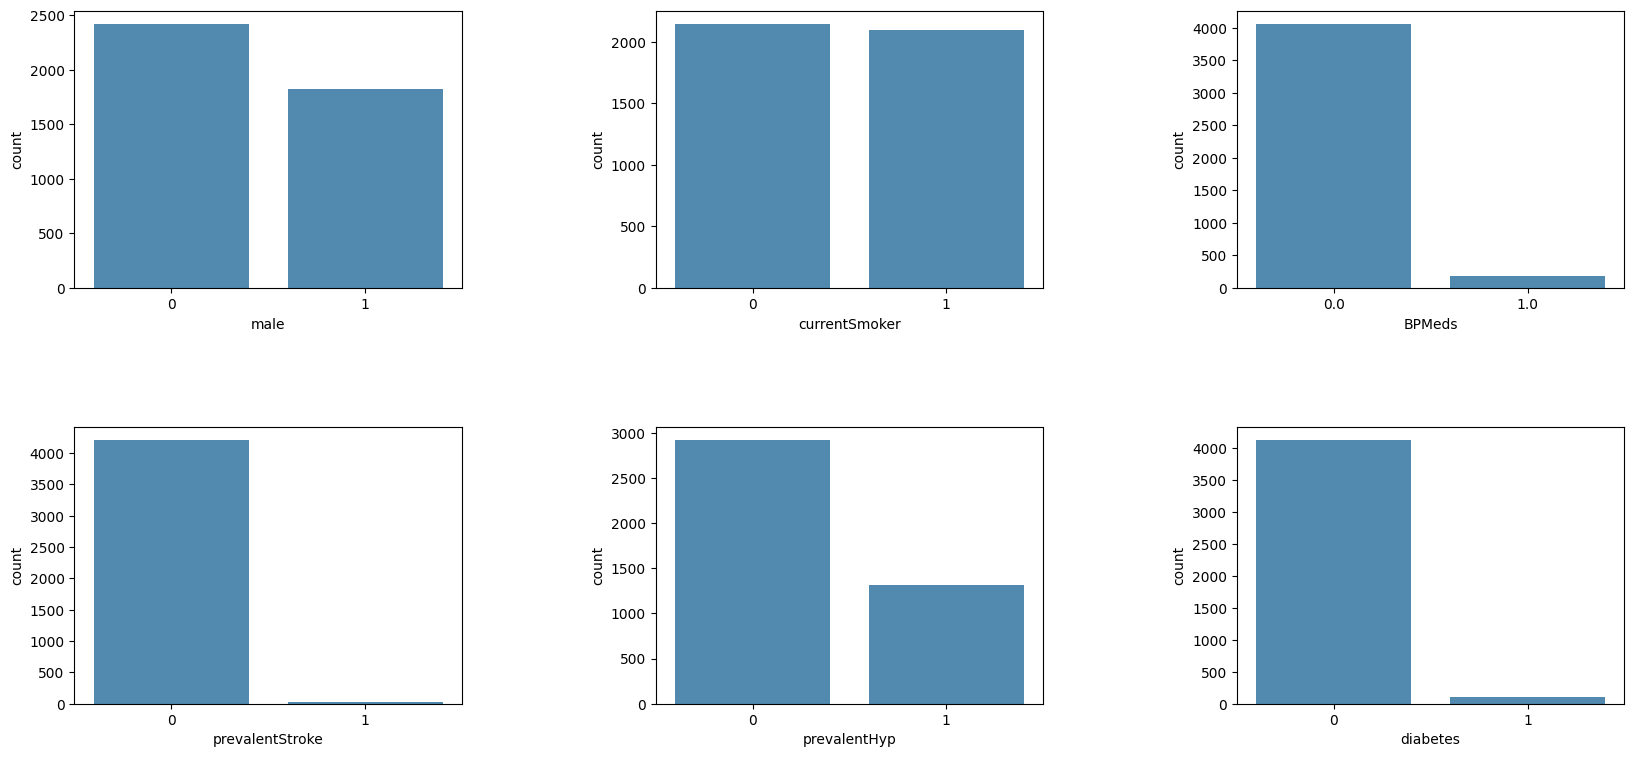

In [11]:
plt.figure(1 , figsize = (20 , 9))

n = 0
for f in discreteFeat:
    n += 1
    plt.subplot(2 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.countplot(x = f , data = df , alpha = 0.85)

plt.show()

# Vizualising the continous Variables

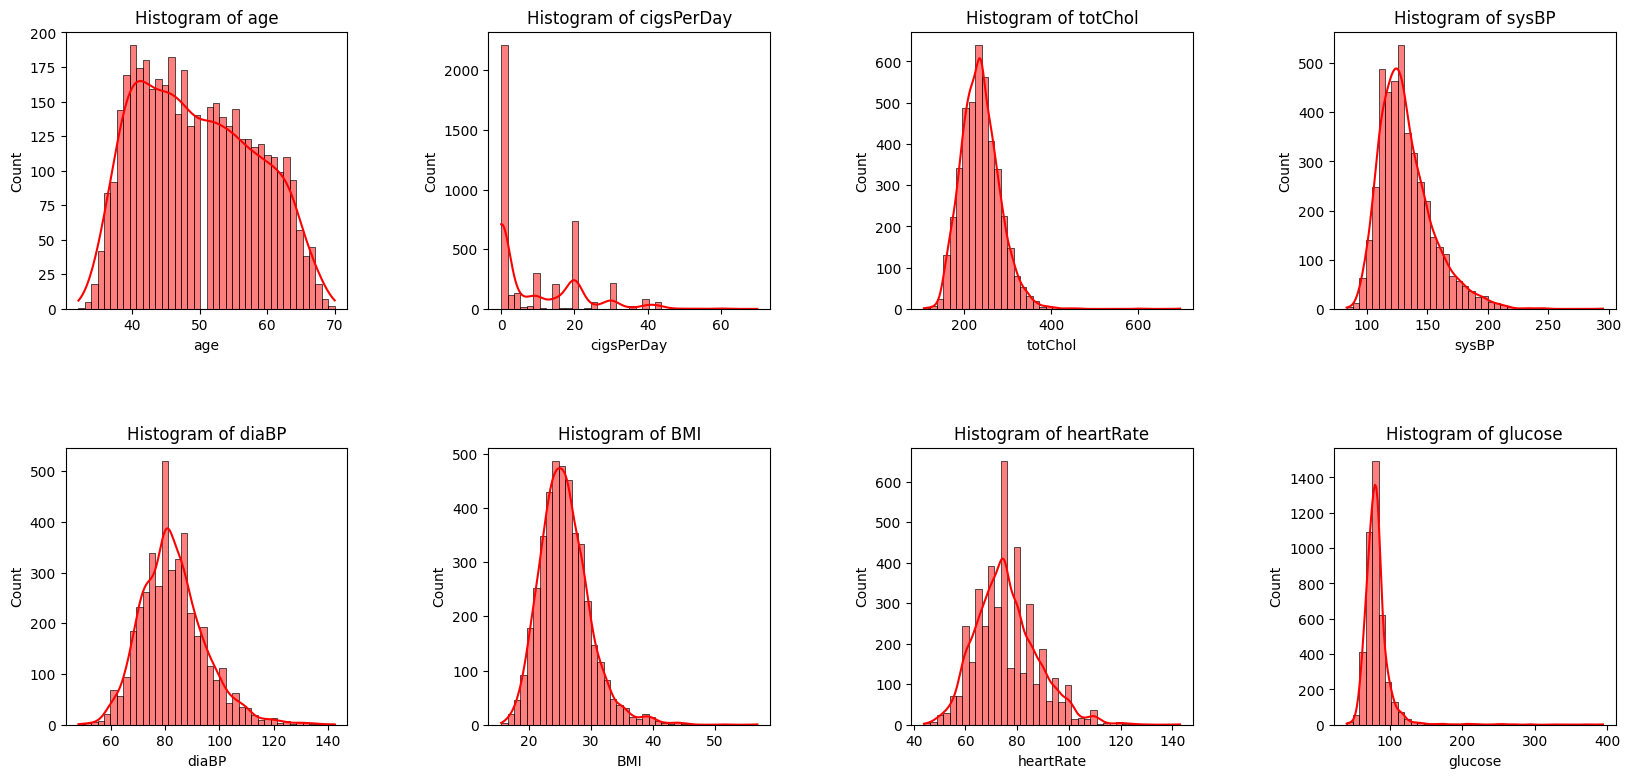

In [12]:
plt.figure(1, figsize=(20, 9))

n = 0
for f in contFeat:
    n += 1
    plt.subplot(2, 4, n)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.histplot(df[f], bins=40, color='red', kde=True)
    plt.title('Histogram of {}'.format(f))

plt.show()

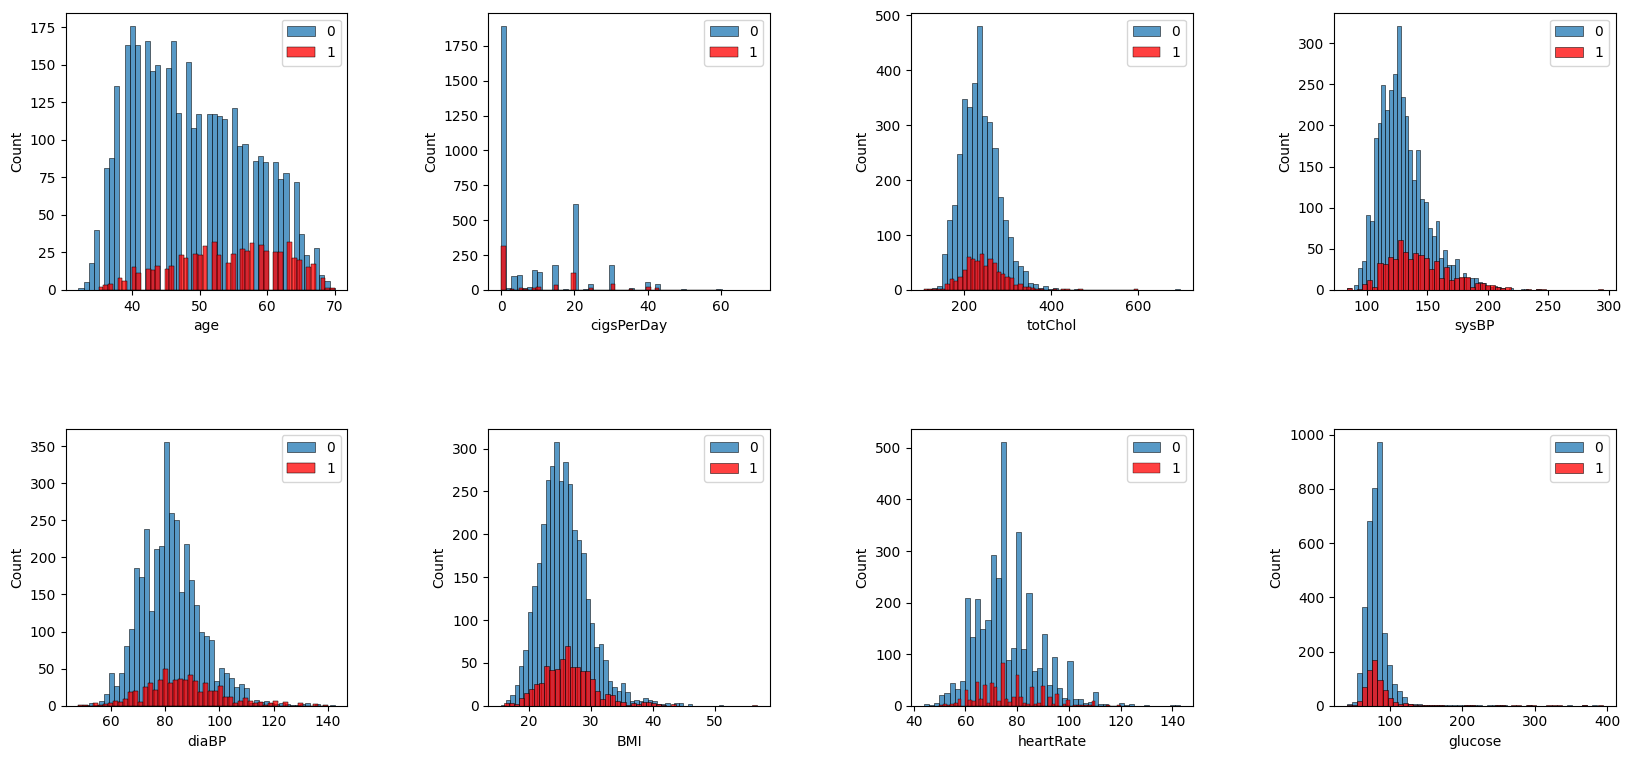

In [13]:
plt.figure(1 , figsize = (20 , 9))
n = 0
for f in contFeat:
    n += 1
    plt.subplot(2 , 4 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.histplot(df[f][df['TenYearCHD'] == 0] , bins = 50 , label = '0')
    sns.histplot(df[f][df['TenYearCHD'] == 1] , bins = 50 , color = 'red' , label = '1')
    plt.legend()

plt.show()

# Scatter Plot vizualizing
We will be using the scatter plot to visually explore the relationship between two continuous variables within our dataset. By incorporating a 'hue' parameter, we can differentiate between two groups based on a discrete variable, allowing us to observe patterns and potential interactions between the variables. The scatter plot will help in identifying trends, clusters, and potential outliers, providing valuable insights into the underlying data structure and aiding in the development of predictive models.

In [14]:
def scatter_plot(x , y , hue , label1 , label2 , s1 = 50 , s2 = 100):

    plt.scatter(x = x , y = y , s = s1 , data = df[df[hue] == 0] ,
                label = label1 , alpha = 0.8 )

    plt.scatter(x = x , y = y , s = s2 , data = df[df[hue] == 1] ,
                label = label2 , color = 'red' , alpha = 0.5 )

    plt.xlabel(x)
    plt.ylabel(y)
    plt.legend()

We are creating visualizations to analyze the relationship between age and other health indicators with respect to the risk of coronary heart disease (CHD). The first scatter plot examines the relationship between age and heart rate, highlighting the differences in heart rate for individuals with and without a ten-year CHD risk. The second plot investigates the relationship between age and Body Mass Index (BMI), again distinguishing between those at risk and those not at risk of CHD. By plotting these relationships side-by-side, we can gain insights into how age interacts with these health metrics and how they correlate with CHD risk.

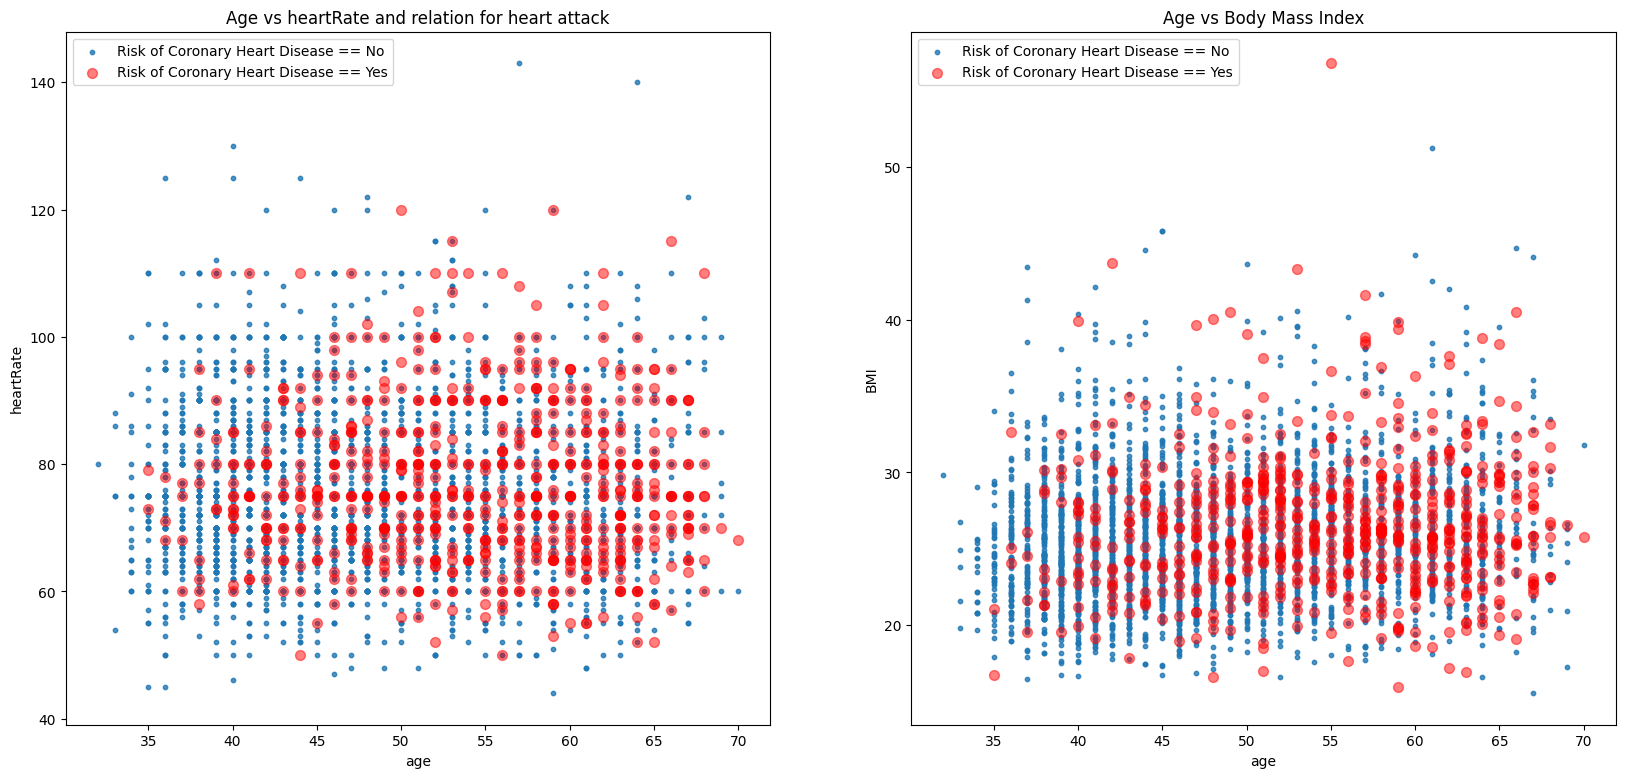

In [15]:
plt.figure(1 , figsize = (20 ,9))

plt.subplot(1 , 2 , 1)
scatter_plot(x = 'age' , y = 'heartRate' ,hue = 'TenYearCHD' , label1 = 'Risk of Coronary Heart Disease == No' ,
             label2 = 'Risk of Coronary Heart Disease == Yes' ,s1 = 10 , s2 = 50)
plt.title('Age vs heartRate and relation for heart attack')

plt.subplot(1 , 2 , 2)
scatter_plot(x = 'age' , y = 'BMI' ,hue = 'TenYearCHD' , label1 = 'Risk of Coronary Heart Disease == No' ,
             label2 = 'Risk of Coronary Heart Disease == Yes' ,s1 = 10 , s2 = 50)
plt.title('Age vs Body Mass Index')

plt.show()

The plots suggest that age, heart rate, and BMI, when considered individually, do not exhibit strong, clear differences between those with and without CHD risk. This implies that a combination of multiple factors, rather than these variables alone, may be necessary to accurately predict CHD risk.

We are visualizing the relationship between systolic blood pressure (sysBP) and diastolic blood pressure (diaBP) with respect to the ten-year risk of coronary heart disease (CHD). In the scatter plot, we differentiate between individuals with and without CHD risk using different marker sizes.

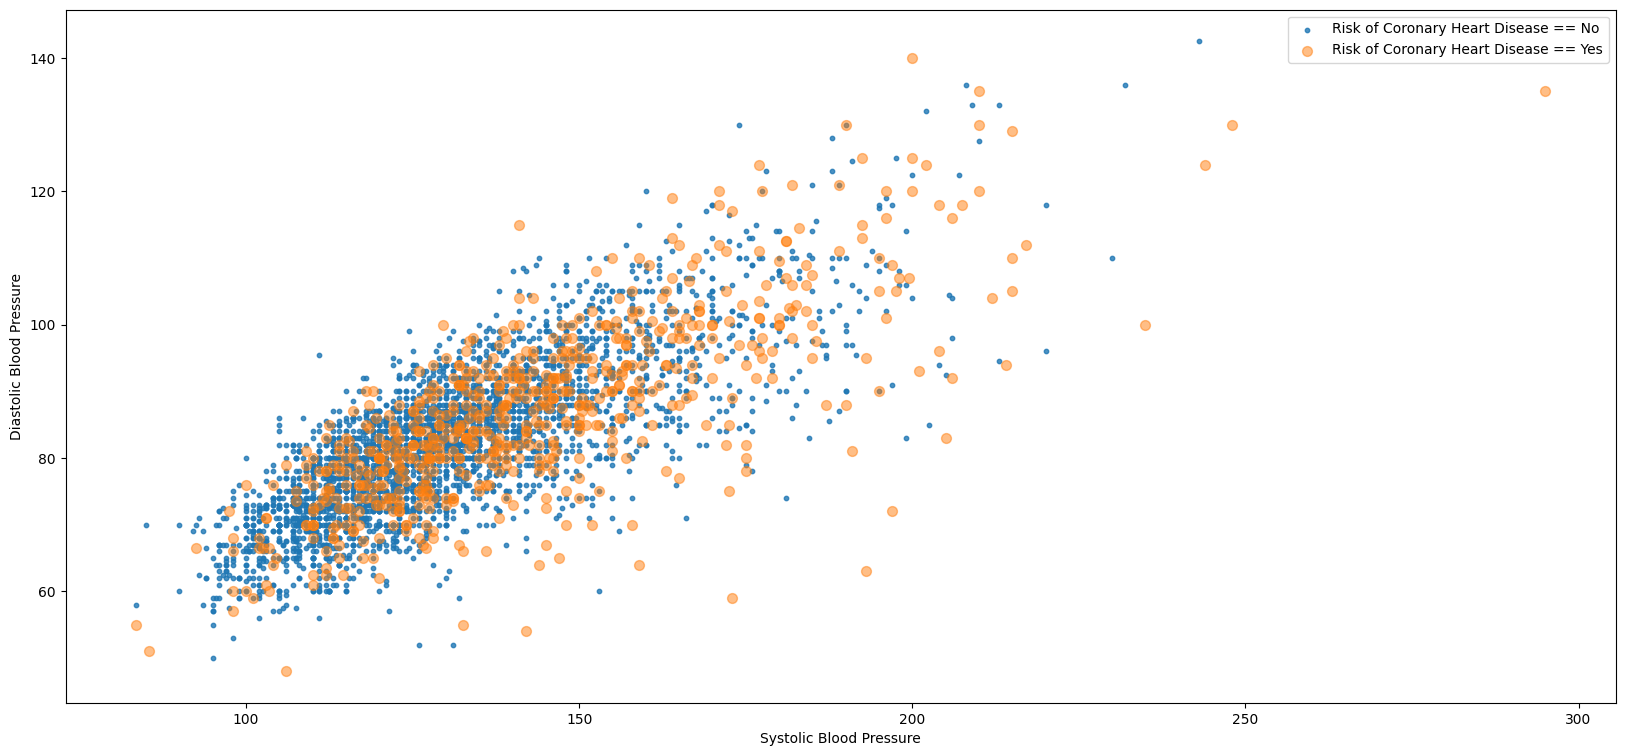

In [16]:
plt.figure(1 , figsize = (20 , 9))

plt.scatter(x = 'sysBP' , y = 'diaBP' , s = 10 , data = df[df['TenYearCHD'] == 0] ,
            label = 'Risk of Coronary Heart Disease == No' , alpha = 0.8 )
plt.scatter(x = 'sysBP' , y = 'diaBP' , s = 50 , data = df[df['TenYearCHD'] == 1] ,
            label = 'Risk of Coronary Heart Disease == Yes' , alpha = 0.5 )

plt.xlabel('Systolic Blood Pressure')
plt.ylabel('Diastolic Blood Pressure')
plt.legend()

plt.show()

**Blood Pressure Distribution:**

Both systolic and diastolic blood pressures show a positive correlation, as expected, indicating that higher systolic blood pressure generally accompanies higher diastolic blood pressure.

**CHD Risk Analysis:**

Individuals with a higher risk of CHD (orange markers) tend to have higher values of both systolic and diastolic blood pressures.
The density of orange markers increases as we move towards higher blood pressure values on both axes, suggesting that elevated blood pressure is associated with an increased risk of CHD.
Overall, the plot indicates that higher values of both systolic and diastolic blood pressures are linked to a higher likelihood of developing coronary heart disease, highlighting the importance of managing blood pressure to mitigate CHD risk.



# **Heart Attack Incidence by Age and Gender**


We are visualizing the incidence of heart attacks across different age groups and genders. By grouping the data based on gender (male and female) and age, and calculating the proportion of individuals within each group who experienced a ten-year coronary heart disease (CHD) event, we aim to identify patterns in heart attack incidence.

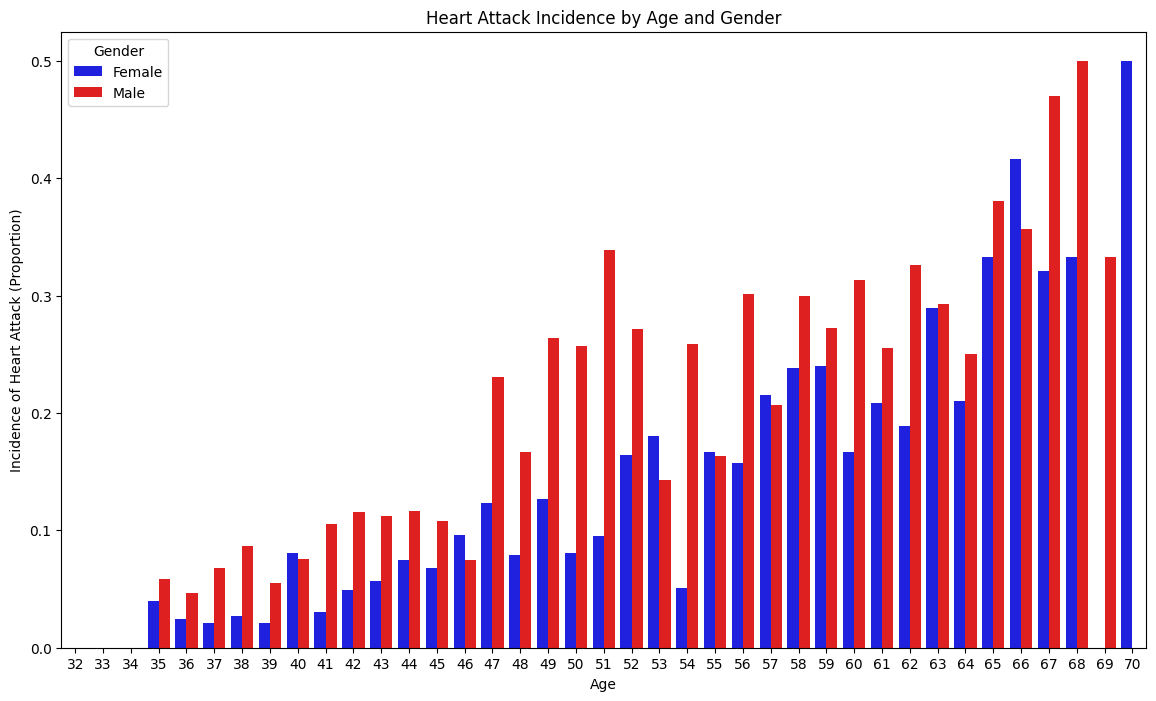

In [17]:

grouped = df.groupby(['male', 'age'])['TenYearCHD'].mean().reset_index()
colors = ['blue', 'red']  # blue for female (0), red for male (1)

plt.figure(figsize=(14, 8))
sns.barplot(data=grouped, x='age', y='TenYearCHD', hue='male', palette=colors)
plt.title('Heart Attack Incidence by Age and Gender')
plt.xlabel('Age')
plt.ylabel('Incidence of Heart Attack (Proportion)')

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, ['Female', 'Male'], title='Gender', loc='best')

plt.show()

The graph shows the incidence of heart attacks by age and gender, ranging from ages 32 to 70. Overall, heart attack risk increases with age for both males and females. Males consistently have a higher incidence of heart attacks compared to females across most age groups. The gap between male and female heart attack rates is particularly pronounced in middle age (40s to 50s). This higher incidence among middle-aged males may be attributed to work-related stress and other lifestyle factors. As age increases, especially beyond 60, the difference between male and female heart attack rates begins to narrow. By age 70, the incidence rates for both genders converge at a high level, indicating elevated risk for all elderly individuals regardless of gender.

# **Cigs Per Day by Age and Gender**

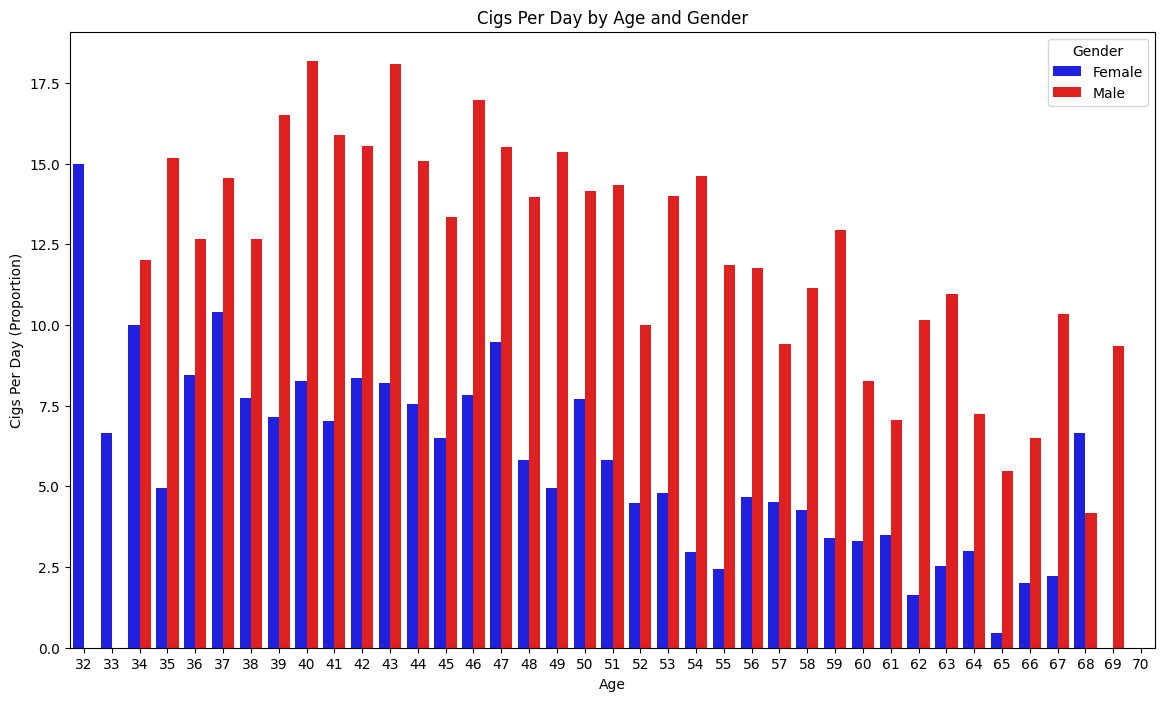

In [26]:
grouped = df.groupby(['male', 'age'])['cigsPerDay'].mean().reset_index()
colors = ['blue', 'red']  # blue for female (0), red for male (1)

plt.figure(figsize=(14, 8))
sns.barplot(data=grouped, x='age', y='cigsPerDay', hue='male', palette=colors)
plt.title('Cigs Per Day by Age and Gender')
plt.xlabel('Age')
plt.ylabel('Cigs Per Day (Proportion)')

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, ['Female', 'Male'], title='Gender', loc='best')

plt.show()

This graph depicts the average number of cigarettes smoked per day by age and gender. Key findings include:

1. Males generally smoke more cigarettes per day than females across most age groups.

2. The highest smoking rates for males occur in the middle age range, with peaks around 18 cigarettes per day.

3. Female smoking rates are consistently lower, rarely exceeding 10 cigarettes per day.

4. There's a notable exception at the youngest age shown, where females have a higher smoking rate than males.

5. Male smoking rates show more variability across age groups, while female rates remain more consistent.

6. Both genders show a general trend of decreased smoking in older age groups, though the decline is more pronounced for males.

These patterns suggest that middle-aged males are particularly prone to heavy smoking, possibly due to work-related stress and other lifestyle factors, mirroring the heart attack incidence trends observed in the previous graph.

# **current smokers by age group**

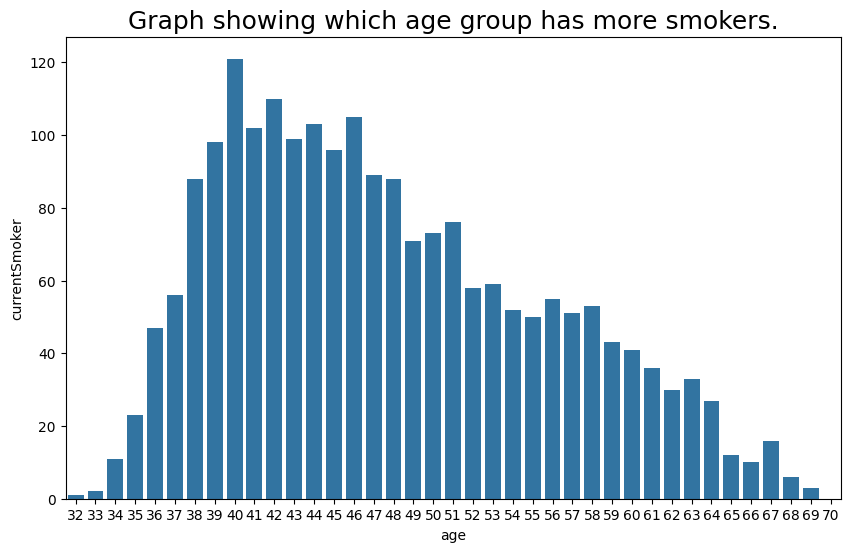

In [18]:
graph = df.groupby("age",as_index=False).currentSmoker.sum()
plt.figure(figsize=(10,6))
sns.barplot(x=graph["age"], y=graph["currentSmoker"])
plt.title("Graph showing which age group has more smokers.",{'fontsize':18});

This graph illustrates the number of current smokers by age group. Key observations include:

1. The highest number of smokers is found in the middle-age range, particularly between ages 38-45.

2. The peak occurs around age 39-40, with over 120 smokers in that age group.

3. There's a general trend of increasing smoker numbers from the youngest age groups until middle age.

4. After the peak in middle age, there's a gradual decline in smoker numbers as age increases.

5. The lowest number of smokers is found in the youngest (early 30s) and oldest (late 60s and 70) age groups.

6. The decline in smoker numbers is more pronounced after age 50.

This data suggests that smoking habits are most prevalent in middle-aged adults, possibly due to established habits and stress factors. The lower numbers in older age groups may reflect health concerns or successful quitting efforts. The trend aligns with the previous graphs showing higher heart attack risks and cigarette consumption in middle-aged individuals, particularly males.

# **Smoking Intensity and 10-Year Coronary Heart Disease Risk: A Comparative Distribution**

<ipython-input-19-10123d07b199>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='TenYearCHD', y='cigsPerDay', data=filtered_df, palette='Set2')


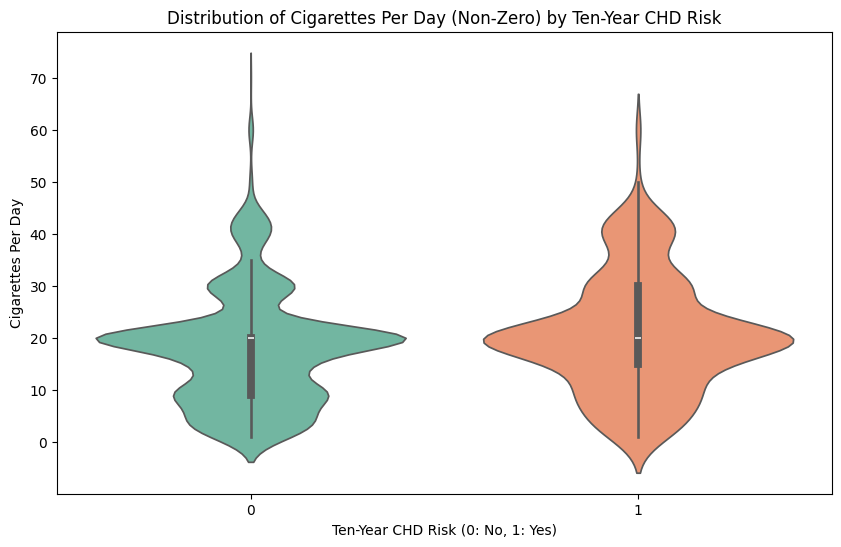

In [19]:
filtered_df = df[df['cigsPerDay'] > 0]
plt.figure(figsize=(10, 6))
sns.violinplot(x='TenYearCHD', y='cigsPerDay', data=filtered_df, palette='Set2')
plt.title('Distribution of Cigarettes Per Day (Non-Zero) by Ten-Year CHD Risk')
plt.xlabel('Ten-Year CHD Risk (0: No, 1: Yes)')
plt.ylabel('Cigarettes Per Day')
plt.show()

This violin plot illustrates the distribution of cigarettes smoked per day for two groups: those with low (0) and high (1) ten-year coronary heart disease (CHD) risk. Key observations include:

1. Both distributions are multimodal, showing several peaks in smoking frequency.

2. The high-risk group (1) has a slightly higher median number of cigarettes smoked per day.

3. The high-risk group's distribution is more concentrated in the middle range (around 20-40 cigarettes per day).

4. The low-risk group (0) shows a wider spread, with more representation in both lower and higher smoking frequencies.

5. Both groups have some individuals who smoke very heavily (60-70 cigarettes per day), but this is relatively rare.

6. The low-risk group has a more pronounced lower peak, suggesting more light smokers in this category.

This graph suggests a complex relationship between smoking habits and CHD risk. While heavy smoking is present in both groups, there's a tendency for those at high risk of CHD to cluster around moderate to heavy smoking levels. However, the considerable overlap between distributions indicates that other factors beyond smoking quantity likely contribute to CHD risk.

# **Ten-year CHD risk for people with and without a history of stroke**

<ipython-input-20-603fb99e7fde>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='prevalentStroke', y='TenYearCHD', data=grouped, palette='Set2')


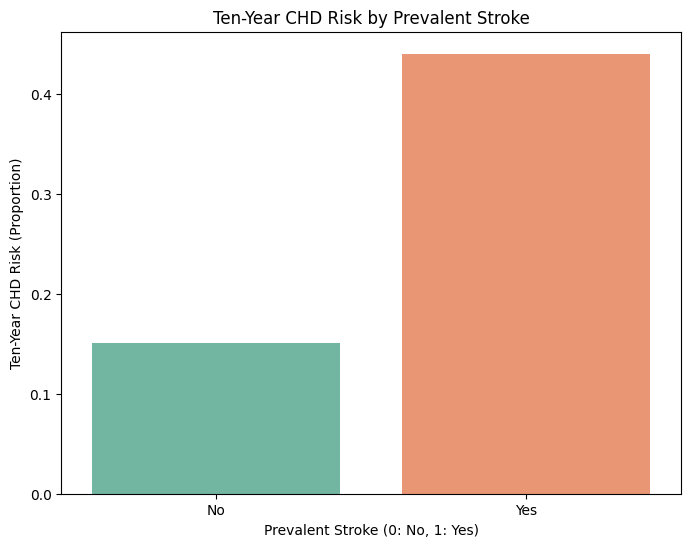

In [20]:
grouped = df.groupby('prevalentStroke')['TenYearCHD'].mean().reset_index()

# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(x='prevalentStroke', y='TenYearCHD', data=grouped, palette='Set2')
plt.title('Ten-Year CHD Risk by Prevalent Stroke')
plt.xlabel('Prevalent Stroke (0: No, 1: Yes)')
plt.ylabel('Ten-Year CHD Risk (Proportion)')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

People who have a history of stroke (indicated by "1: Yes" on the x-axis) have a higher risk of developing coronary heart disease (CHD) within ten years compared to those with no history of stroke (indicated by "0: No" on the x-axis). This is because the bar for "1: Yes" is positioned higher on the y-axis than the bar for "0: No".

# **Ten-year CHD risk for people with Hyper Tension**

<ipython-input-21-b74234867ac5>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='prevalentHyp', y='TenYearCHD', data=grouped, palette='Set2')


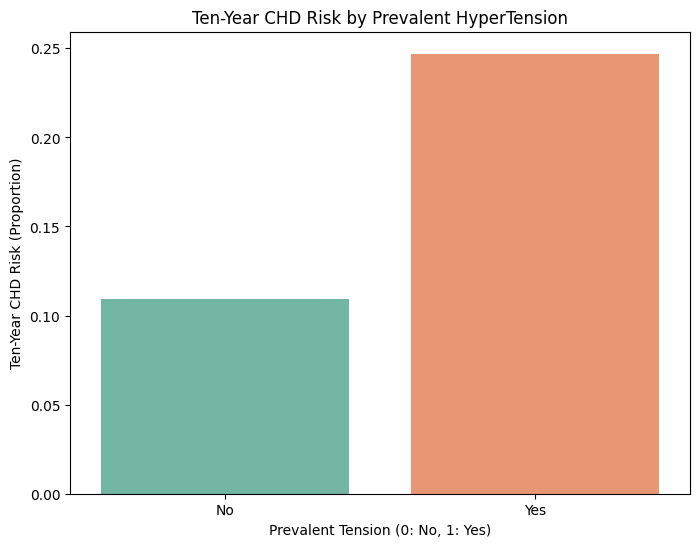

In [21]:
grouped = df.groupby('prevalentHyp')['TenYearCHD'].mean().reset_index()

# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(x='prevalentHyp', y='TenYearCHD', data=grouped, palette='Set2')
plt.title('Ten-Year CHD Risk by Prevalent HyperTension')
plt.xlabel('Prevalent Tension (0: No, 1: Yes)')
plt.ylabel('Ten-Year CHD Risk (Proportion)')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

People who have Hyper Tension(indicated by "1: Yes" on the x-axis) have a higher risk of developing coronary heart disease (CHD) within ten years compared to those with no Hyper Tesnion (indicated by "0: No" on the x-axis). This is because the bar for "1: Yes" is positioned higher on the y-axis than the bar for "0: No".

# **Ten-year CHD risk for people with Hyper Tension**

<ipython-input-22-afe393f2cc36>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='diabetes', y='TenYearCHD', data=grouped, palette='Set2')


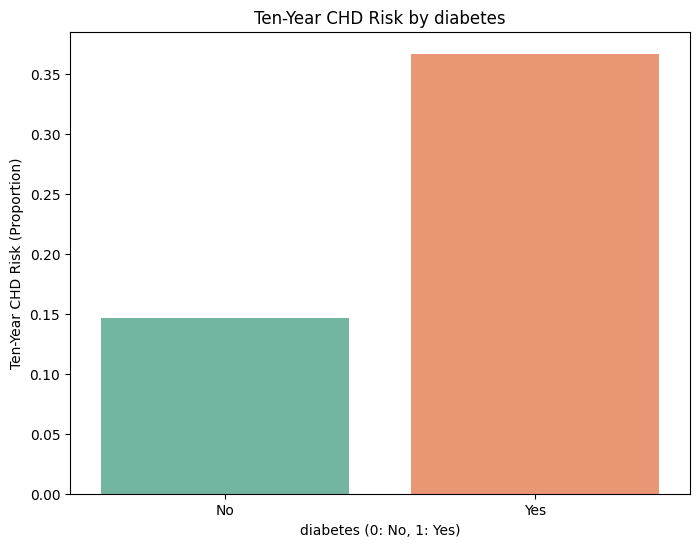

In [22]:
grouped = df.groupby('diabetes')['TenYearCHD'].mean().reset_index()

# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(x='diabetes', y='TenYearCHD', data=grouped, palette='Set2')
plt.title('Ten-Year CHD Risk by diabetes')
plt.xlabel('diabetes (0: No, 1: Yes)')
plt.ylabel('Ten-Year CHD Risk (Proportion)')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

People who have Diabetes(indicated by "1: Yes" on the x-axis) have a higher risk of developing coronary heart disease (CHD) within ten years compared to those with no Diabetes (indicated by "0: No" on the x-axis). This is because the bar for "1: Yes" is positioned higher on the y-axis than the bar for "0: No".

# **Heart Attack Incidence by Total Cholesterol and BMI**

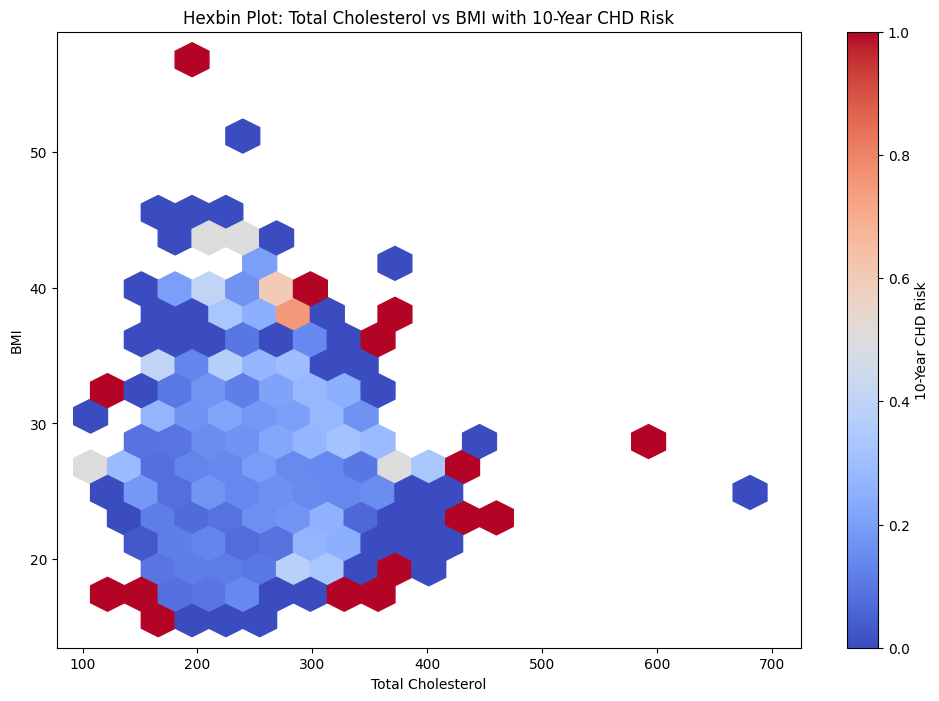

In [23]:
plt.figure(figsize=(12, 8))
plt.hexbin(df['totChol'], df['BMI'], C=df['TenYearCHD'], gridsize=20, cmap='coolwarm')
plt.colorbar(label='10-Year CHD Risk')
plt.title('Hexbin Plot: Total Cholesterol vs BMI with 10-Year CHD Risk')
plt.xlabel('Total Cholesterol')
plt.ylabel('BMI')
plt.show()




The hexbin plot you've created visually represents the relationship between Total Cholesterol (totChol), BMI (Body Mass Index), and the 10-Year Coronary Heart Disease (CHD) Risk (TenYearCHD). In the plot:

- The x-axis represents Total Cholesterol (totChol).
- The y-axis represents BMI (Body Mass Index).
- Color intensity (cool to warm) represents the likelihood of 10-Year CHD Risk (higher risk indicated by warmer colors).

From the plot, if points are clustered in the warmer (red) regions, it suggests that individuals with higher Total Cholesterol and BMI tend to have a higher risk of developing coronary heart disease over the next 10 years. This visual representation helps in understanding how these factors may correlate with heart disease risk.

# **Conclusion**

From the analysis presented, several key insights into the factors influencing the risk of coronary heart disease (CHD) can be drawn:

1. **Multifactorial Nature of CHD Risk:** Individual health indicators such as age, blood pressure, cholesterol levels, BMI, and lifestyle habits like smoking play significant roles in determining CHD risk. No single factor alone can reliably predict CHD risk; instead, it's the combination and interaction of these factors that contribute to overall risk.

2. **Age and Gender Dynamics:** Both age and gender influence CHD risk. Middle-aged individuals, especially males, exhibit higher incidences of heart attacks and tend to smoke more heavily. As age advances, the disparity in heart attack rates between genders diminishes, highlighting the universal risk posed by aging.

3. **Blood Pressure and Diabetes:** Elevated blood pressure (hypertension) and diabetes are strong indicators of increased CHD risk. Individuals with these conditions show higher average CHD risk compared to those without, emphasizing the importance of managing these health factors.

4. **Cholesterol and BMI:** Higher levels of total cholesterol and BMI are associated with greater 10-year CHD risk. The hexbin plot illustrates how individuals with elevated cholesterol and BMI levels tend to cluster in regions indicating higher CHD risk, underscoring the need for lifestyle modifications and monitoring.

5. **Smoking Habits:** Smoking habits also contribute significantly to CHD risk, with heavier smokers more likely to fall into higher risk categories. Quitting smoking or reducing cigarette consumption can mitigate some of this risk.

**Conclusion:**
Effective management and reduction of coronary heart disease risk require a comprehensive approach that addresses multiple health factors simultaneously. This includes regular monitoring of blood pressure, cholesterol levels, BMI, and adopting healthy lifestyle habits such as smoking cessation and maintaining a balanced diet and physical activity. By understanding the complex interplay of these factors, healthcare professionals can better tailor preventive strategies and interventions to reduce the incidence of CHD and improve overall cardiovascular health in populations at risk.